In [ ]:
import os
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap


In [ ]:
# Define the dataset paths
datasets = {
    #'VinDr': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/cropped_sampled_vindr-mammo_images/cropped_sampled_vindr-mammo_images_resized/center_cropped/equalized_images',
    'DDSM': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/DDSM_all_images_cropped/DDSM_images_resized/DDSM_all_clean_all/center_cropped/equalized_images',
    'InBreast': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/INbreast_cropped_DICOM_images/INbreast_cropped_DICOM_images_resized/center_cropped/equalized_images',
    'MIAS': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/all-mias_cropped_images/all-mias_cropped_images_resized/center_cropped_clean_all_mias/equalized_images',
    'MSYNTH': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/All_images_Elena/Elena_images_resized/equalized_images',
    'HuggingFace': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/HF_synthetic_mammography_csaw /center_cropped',
    'Mammo_medigan': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/Mammo_medigan/medigan_images_resized/center_cropped'
}


In [ ]:
# Load pre-trained VGG16 model without classification layer
#model = VGG16(weights='imagenet', include_top=False)


#def extract_features(img_path):
#    img = image.load_img(img_path, target_size=(512, 512))
#    img_array = image.img_to_array(img)
#    img_array = np.expand_dims(img_array, axis=0)
#    img_array = preprocess_input(img_array)
#   features = model.predict(img_array)
#    return features.flatten()


# Output path for saving features
#output_path = '/content/drive/My Drive/Scorecard_Results/VGG16_Features'


In [ ]:
output_path = '/content/drive/My Drive/Scorecard_Results/VGG16_Features'

def load_features_and_compute_means(datasets):
    features_dict = {}
    for dataset_name in datasets:
        input_filename = os.path.join(output_path, f"{dataset_name}_features.npz")
        if os.path.exists(input_filename):
            data = np.load(input_filename, allow_pickle=True)
            all_vectors = []
            for i in range(len(data.files)-1):  # Skip the 'filenames' entry
                all_vectors.append(data[f'arr_{i}'].flatten())
            features_dict[dataset_name] = np.mean(np.array(all_vectors), axis=0)
            print(f"Loaded and processed {dataset_name}")
        else:
            print(f"Warning: File not found for {dataset_name}")
    return features_dict

# Example usage
all_datasets = ['VinDr', 'DDSM', 'InBreast', 'MIAS', 'MSYNTH', 'HuggingFace', 'Mammo_medigan']
features_dict = load_features_and_compute_means(all_datasets)


Loaded and processed VinDr
Loaded and processed DDSM
Loaded and processed InBreast
Loaded and processed MIAS
Loaded and processed MSYNTH
Loaded and processed HuggingFace
Loaded and processed Mammo_medigan


Direct Image Analysis Method

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import greycomatrix, greycoprops
import scipy.stats as stats
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import scipy.stats as stats

import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import scipy.stats as scipy_stats  # Use scipy_stats to avoid any potential conflict
from scipy.stats import f_oneway
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import greycomatrix, greycoprops
import scipy.stats as stats
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import scipy.stats as stats

import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import scipy.stats as stats




In [ ]:
# Function to calculate statistics for one image
def calculate_image_statistics(image_path):
    image = imread(image_path, as_gray=True)  # Ensure image is loaded in grayscale
    mean = np.mean(image)
    std_dev = np.std(image)
    skewness = stats.skew(image.flatten())
    kurtosis = stats.kurtosis(image.flatten())
    return mean, std_dev, skewness, kurtosis

# Function to process all images in a dataset and calculate statistics
def process_dataset_statistics(dataset_path):
    files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png')]
    statistics = {'mean': [], 'std_dev': [], 'skewness': [], 'kurtosis': []}
    for file in files:
        m, s, sk, k = calculate_image_statistics(file)
        statistics['mean'].append(m)
        statistics['std_dev'].append(s)
        statistics['skewness'].append(sk)
        statistics['kurtosis'].append(k)
    return statistics

# Function to plot statistics
def plot_image_statistics(stats_data, dataset_name):
    fig, axes = plt.subplots(4, 1, figsize=(10, 20))
    stats_titles = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']
    for i, key in enumerate(['mean', 'std_dev', 'skewness', 'kurtosis']):
        axes[i].plot(stats_data[key], label=f'{dataset_name} - {key}')
        axes[i].set_title(f'{key} of Images - {dataset_name}')
        axes[i].legend()
        axes[i].set_xlabel('Image Index')
        axes[i].set_ylabel(key.capitalize())
    plt.tight_layout()
    plt.show()

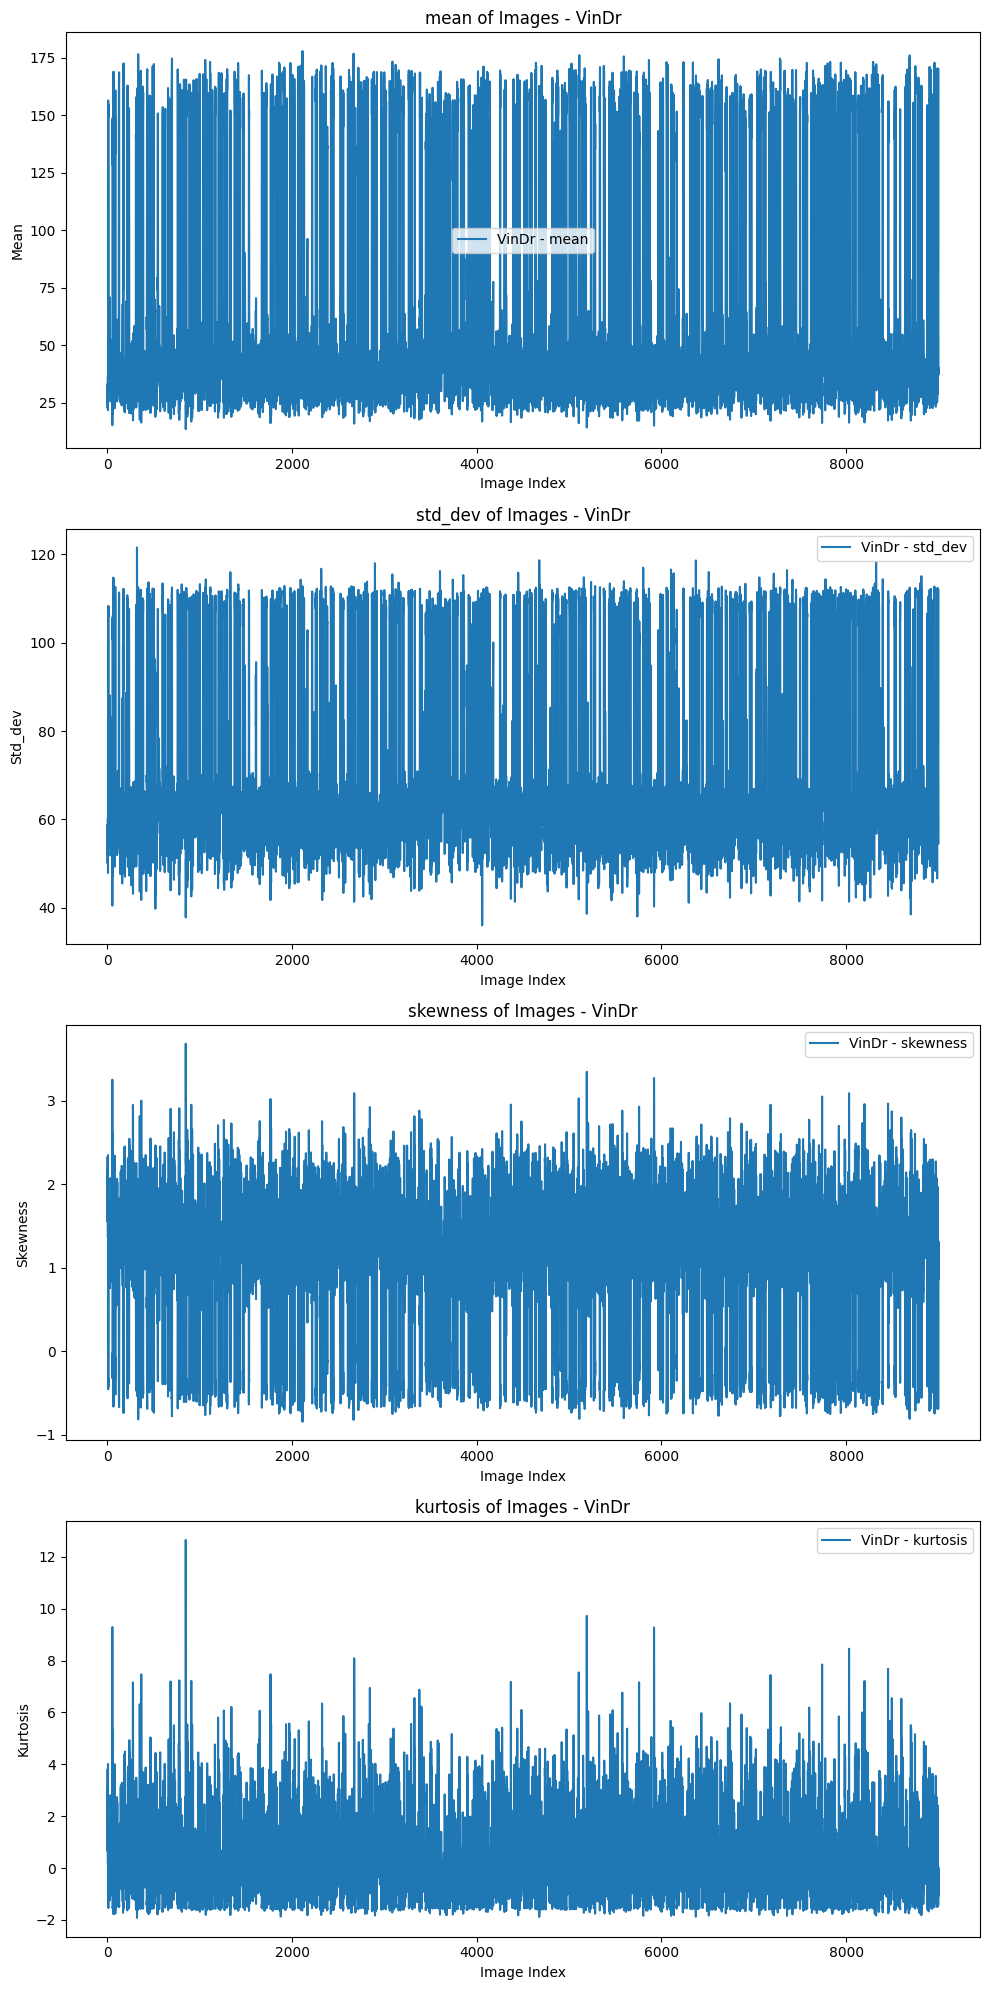

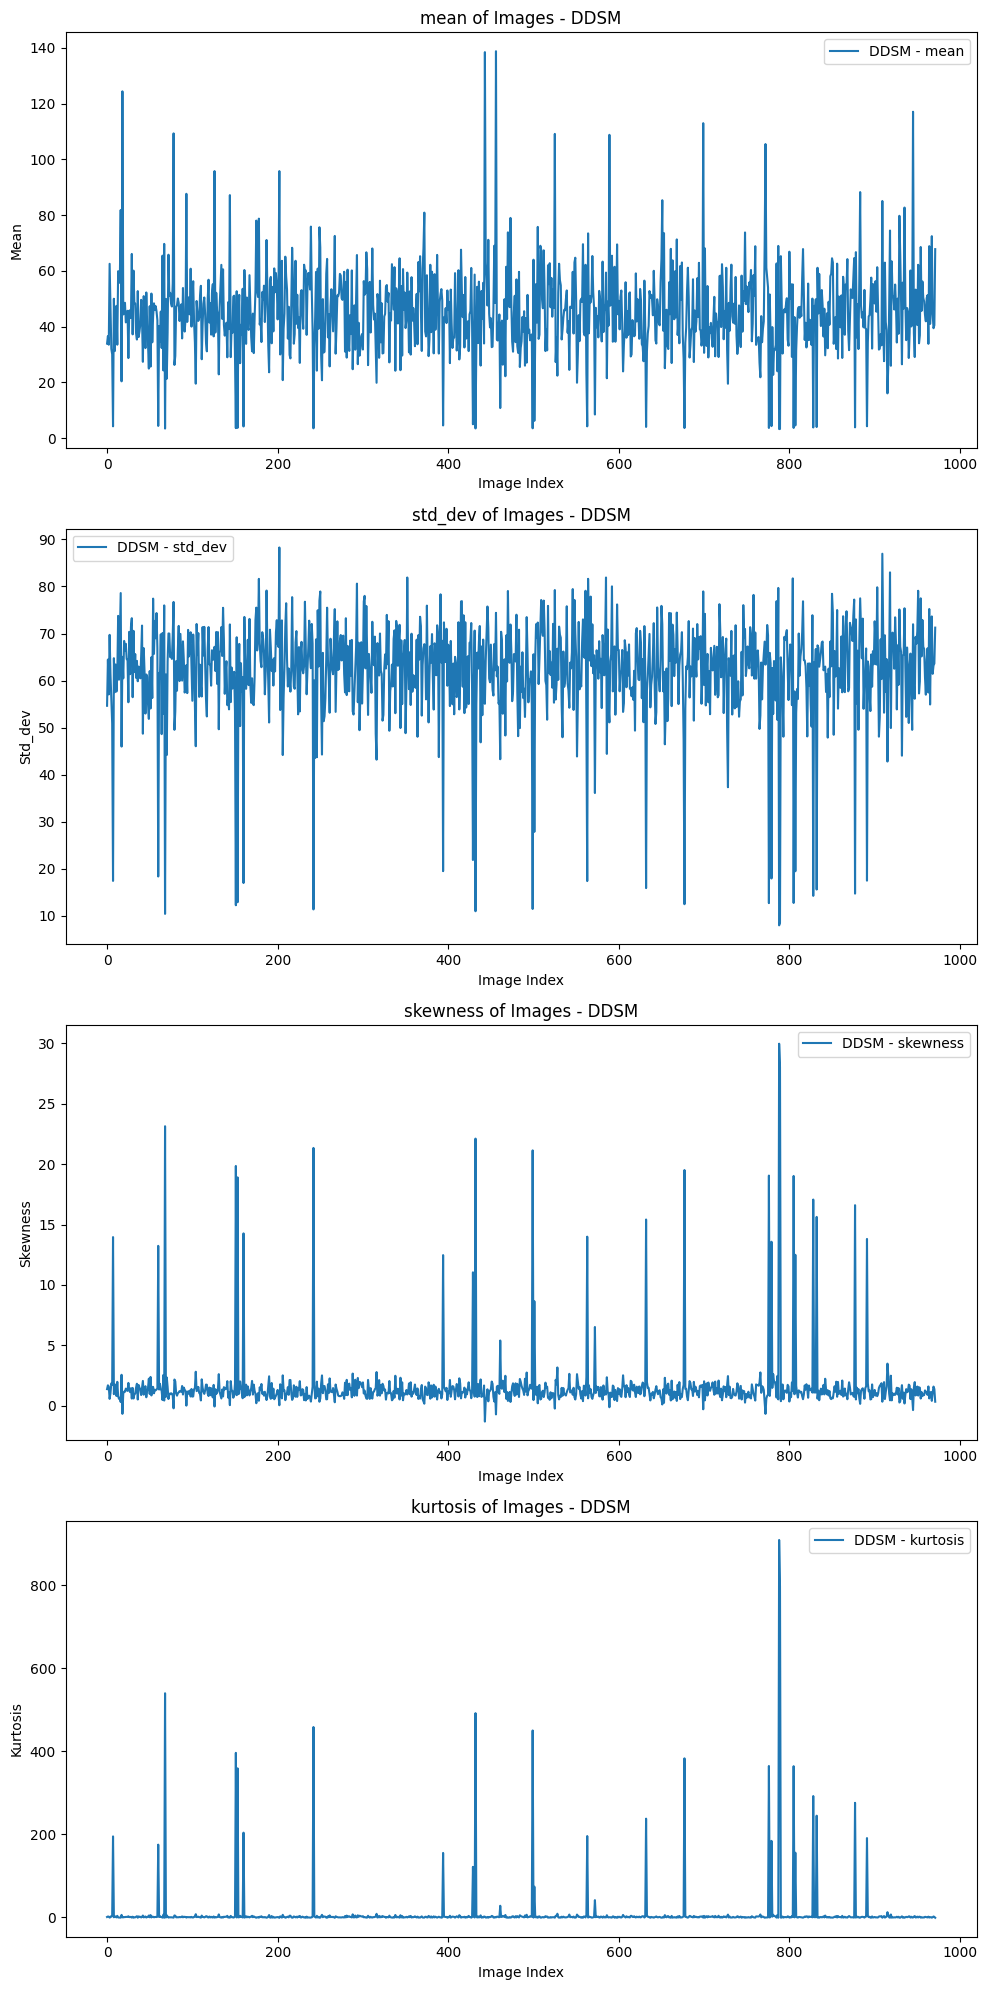

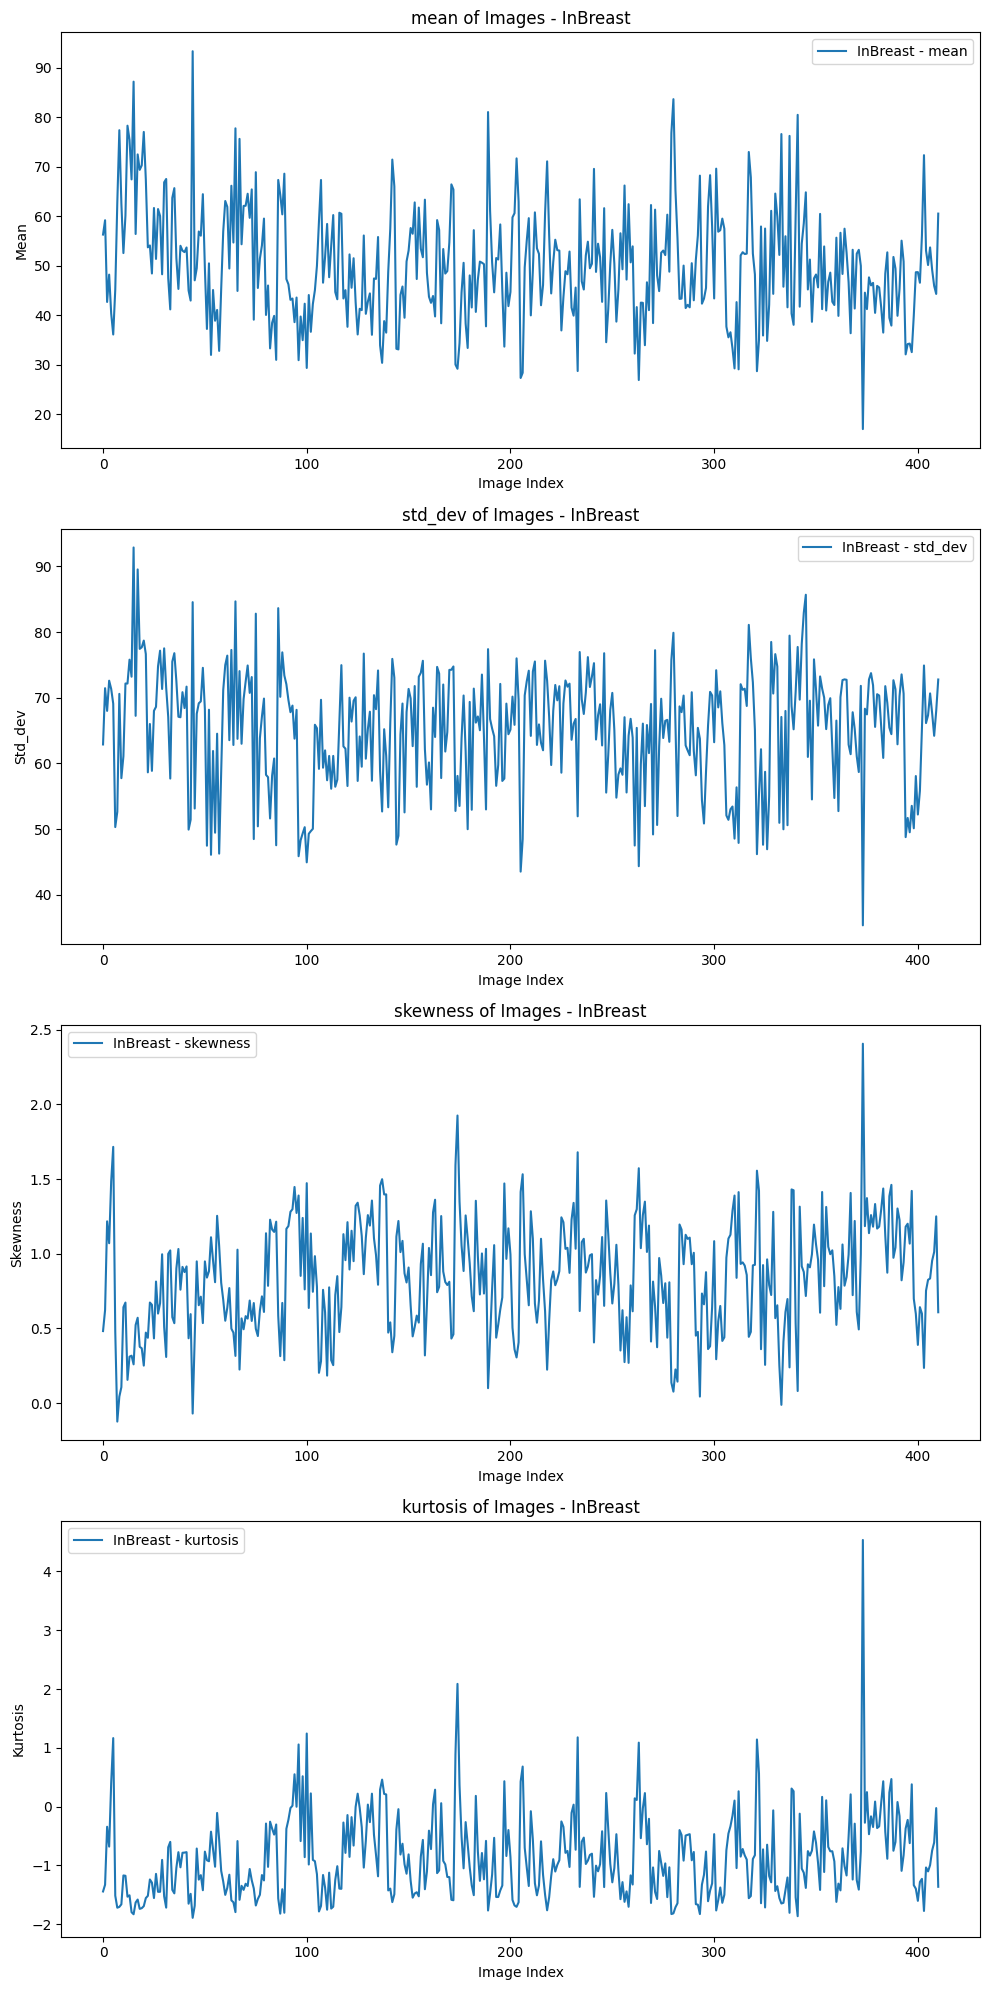

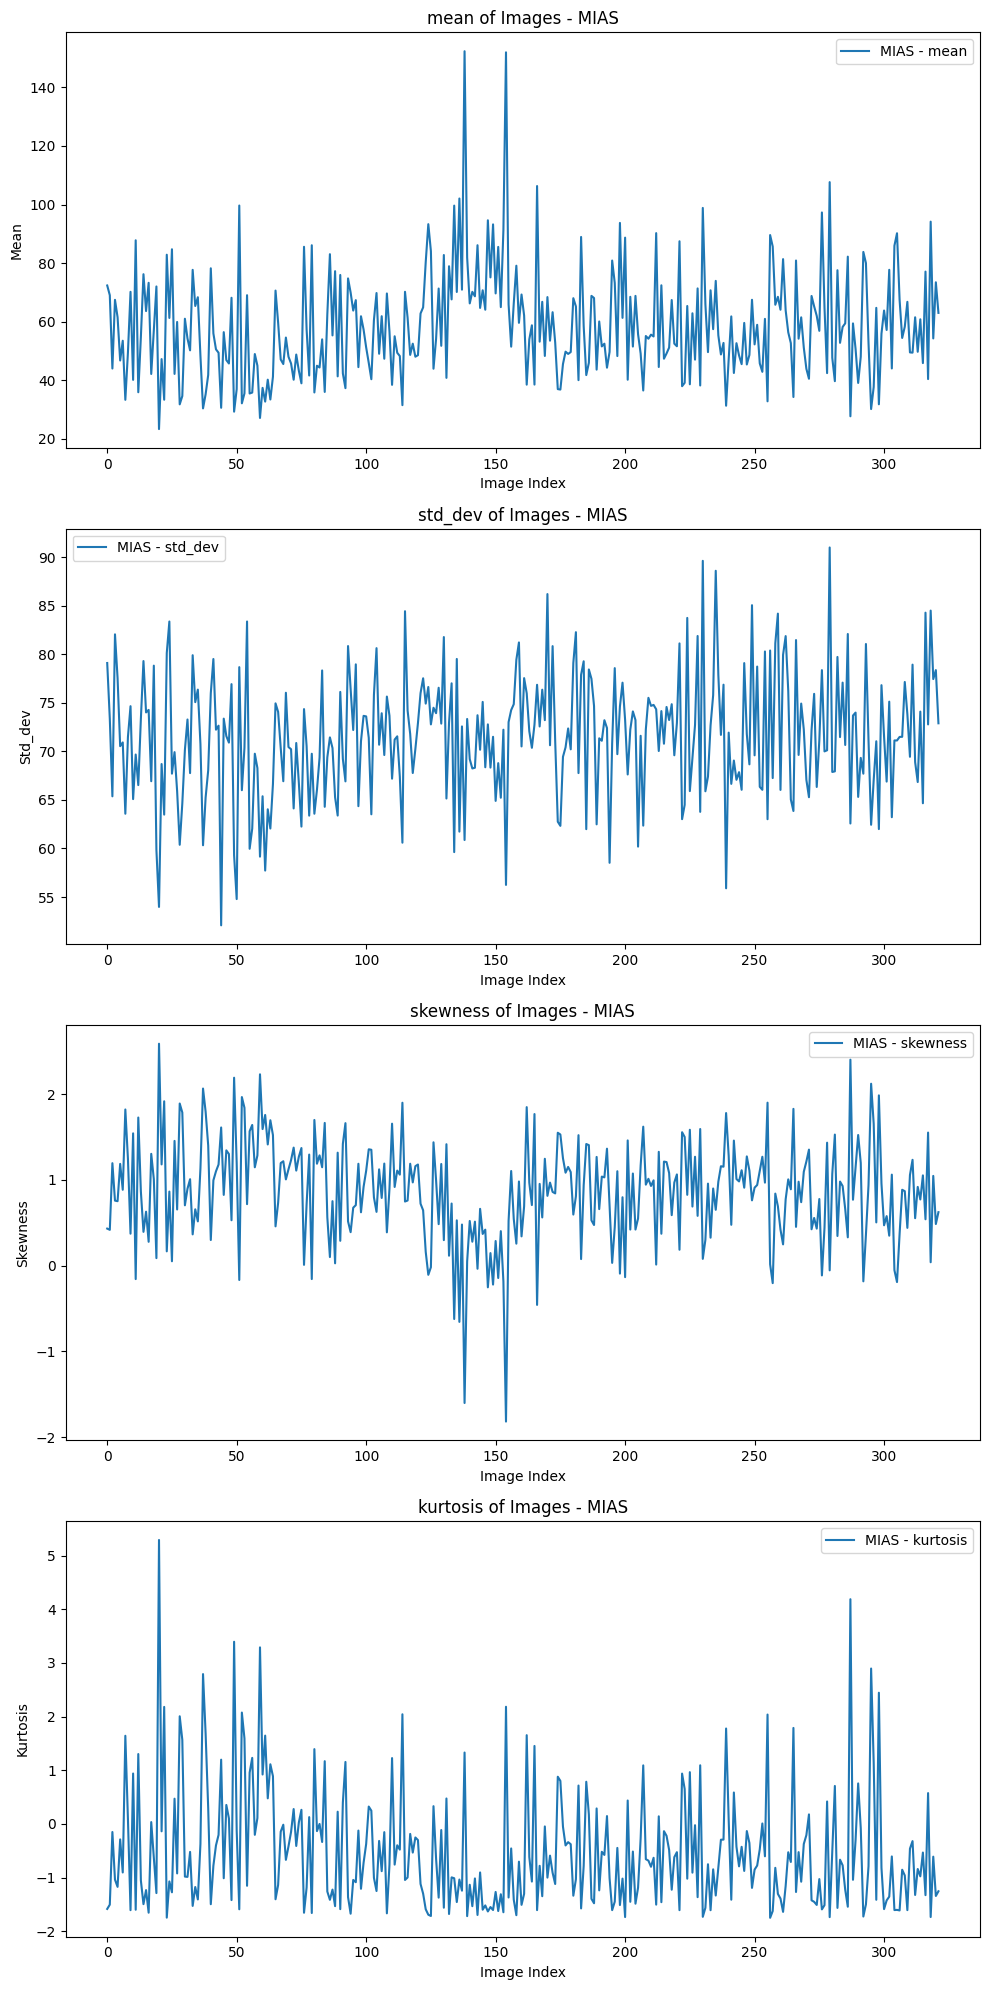

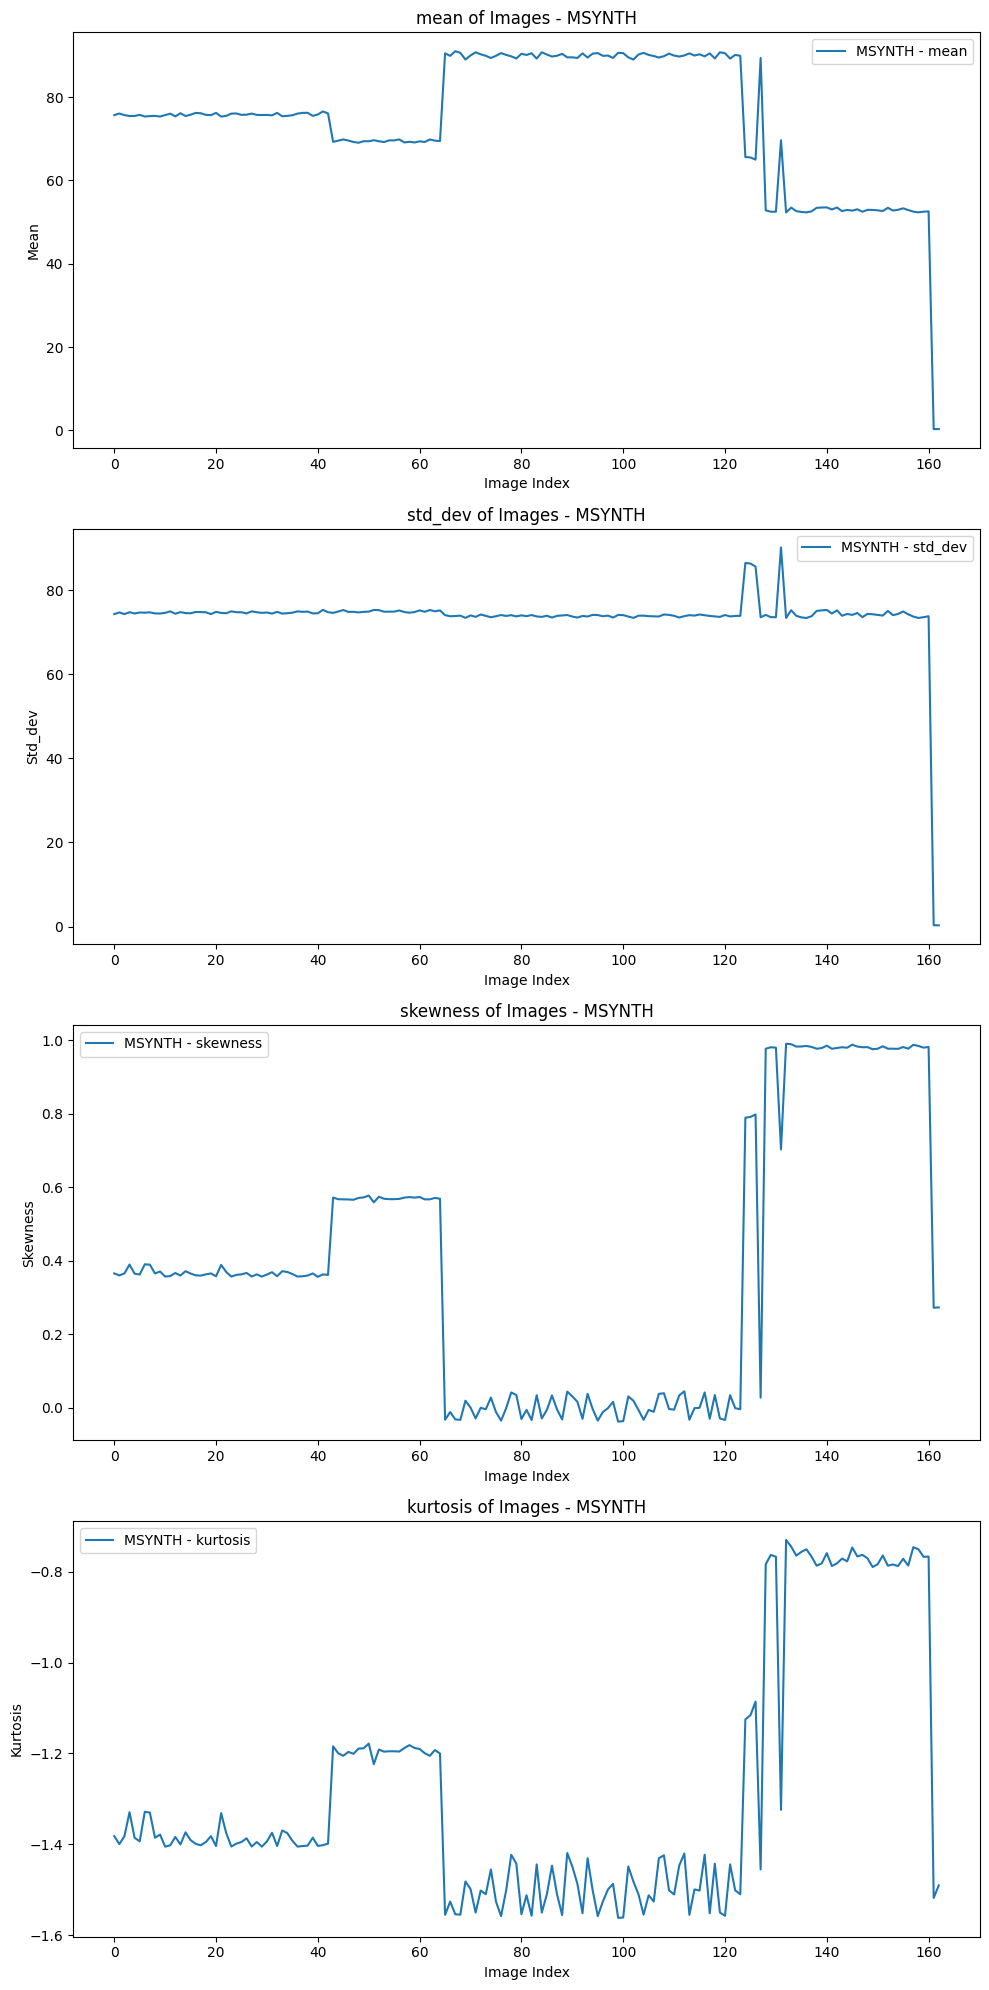

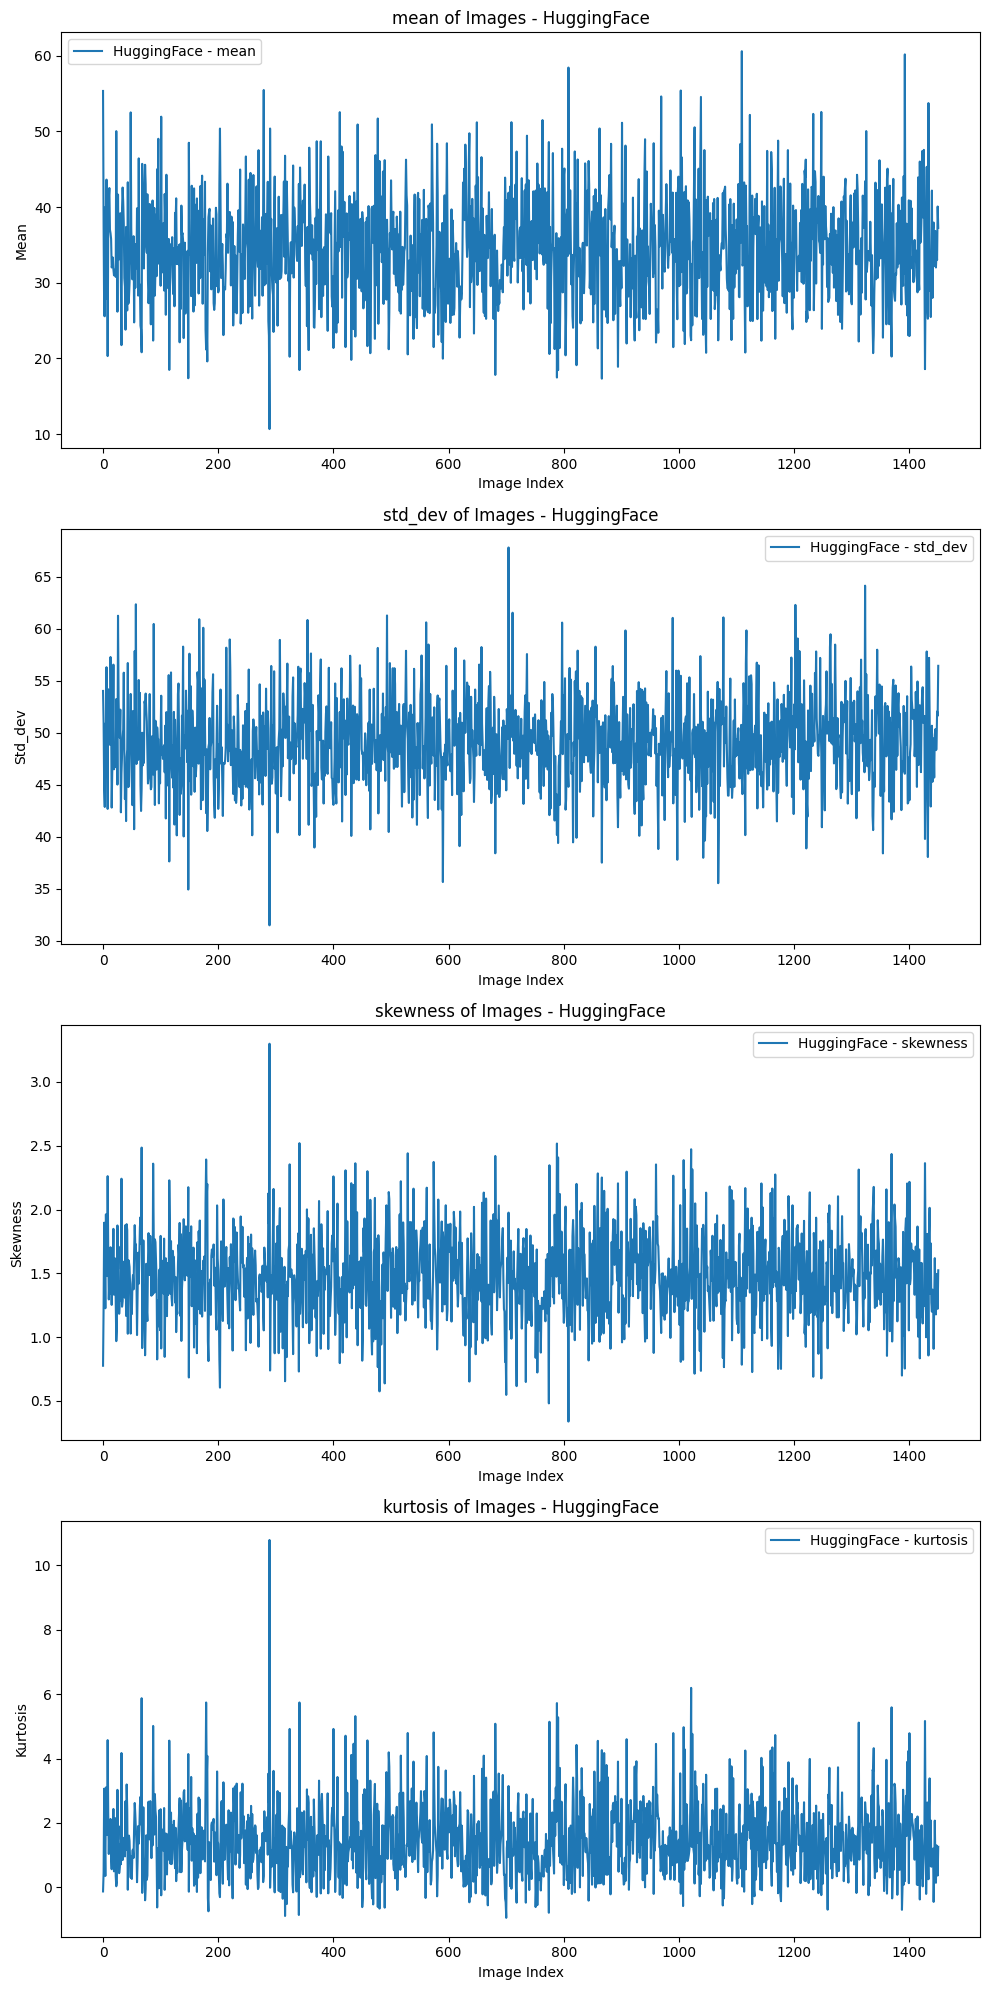

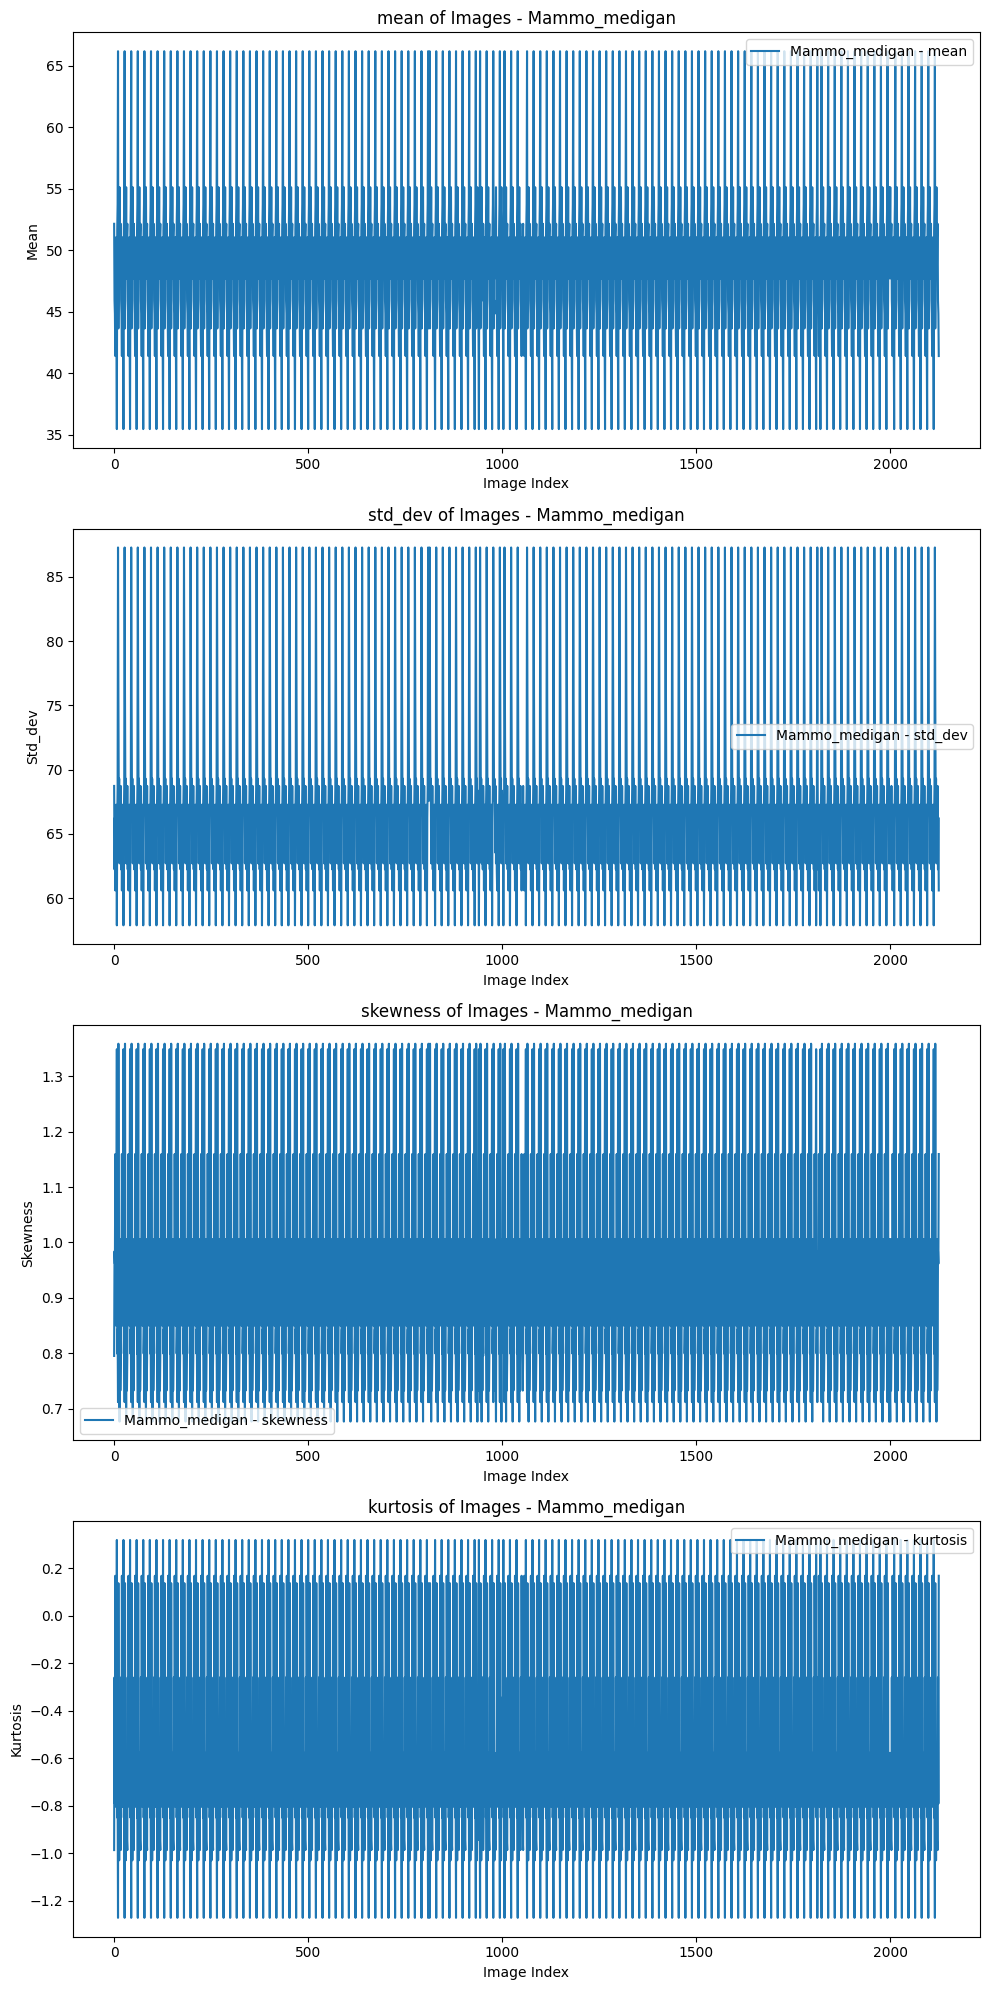

In [ ]:
for name, path in datasets.items():
    stats_data = process_dataset_statistics(path)  # Calculate statistics for the dataset
    plot_image_statistics(stats_data, name)  # Plot image statistics for the dataset


In [ ]:
def aggregate_statistics(stats_data):
    aggregate_stats = {}
    for key in stats_data.keys():
        aggregate_stats[f'{key}_mean'] = np.mean(stats_data[key])
        aggregate_stats[f'{key}_variance'] = np.var(stats_data[key])
    return aggregate_stats

# Apply aggregation to each dataset
aggregated_data = {name: aggregate_statistics(process_dataset_statistics(path)) for name, path in datasets.items()}


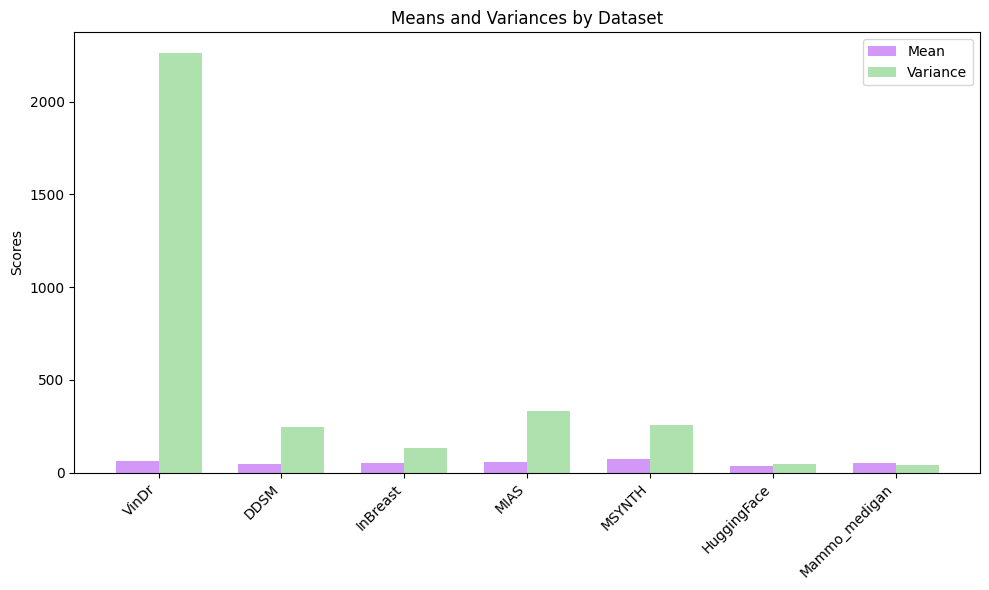

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_aggregated_statistics(aggregated_data):
    labels = list(aggregated_data.keys())
    means = [data['mean_mean'] for data in aggregated_data.values()]
    variances = [data['mean_variance'] for data in aggregated_data.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    # Create a larger figure to accommodate the labels
    fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed
    rects1 = ax.bar(x - width/2, means, width, label='Mean', color='#D397F8')
    rects2 = ax.bar(x + width/2, variances, width, label='Variance', color='#AFE1AF')

    ax.set_ylabel('Scores')
    ax.set_title('Means and Variances by Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate labels for better visibility
    ax.legend()

    plt.tight_layout()  # This automatically adjusts subplot params to give specified padding
    plt.show()

# Example usage, assuming 'aggregated_data' is defined as shown earlier
plot_aggregated_statistics(aggregated_data)


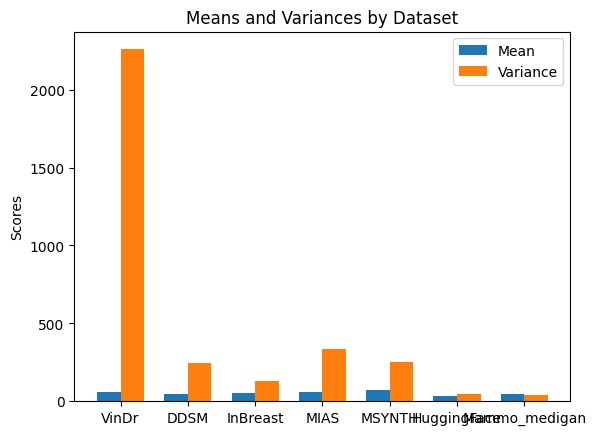

In [ ]:
def plot_aggregated_statistics(aggregated_data):
    labels = aggregated_data.keys()
    means = [data[f'mean_mean'] for data in aggregated_data.values()]
    variances = [data[f'mean_variance'] for data in aggregated_data.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, means, width, label='Mean')
    rects2 = ax.bar(x + width/2, variances, width, label='Variance')

    ax.set_ylabel('Scores')
    ax.set_title('Means and Variances by Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    #fig.tight_layout()
    plt.show()

plot_aggregated_statistics(aggregated_data)


In [ ]:
def calculate_image_statistics(image_path):
    image = imread(image_path, as_gray=True)
    mean = np.mean(image)
    std_dev = np.std(image)
    skewness = stats.skew(image.flatten())
    kurtosis = stats.kurtosis(image.flatten())
    return mean, std_dev, skewness, kurtosis

def process_dataset_statistics(dataset_path):
    files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png')]
    statistics = {'mean': [], 'std_dev': [], 'skewness': [], 'kurtosis': []}
    for file in files:
        m, s, sk, k = calculate_image_statistics(file)
        statistics['mean'].append(m)
        statistics['std_dev'].append(s)
        statistics['skewness'].append(sk)
        statistics['kurtosis'].append(k)
    return statistics

# Dictionary to store statistics for each dataset
all_stats = {}
for name, path in datasets.items():
    all_stats[name] = process_dataset_statistics(path)

# Preparing data for ANOVA
mean_groups = [all_stats[name]['mean'] for name in datasets]
std_dev_groups = [all_stats[name]['std_dev'] for name in datasets]
skewness_groups = [all_stats[name]['skewness'] for name in datasets]
kurtosis_groups = [all_stats[name]['kurtosis'] for name in datasets]

# Conduct ANOVA for each statistic
f_stat_mean, p_value_mean = f_oneway(*mean_groups)
f_stat_std, p_value_std = f_oneway(*std_dev_groups)
f_stat_skew, p_value_skew = f_oneway(*skewness_groups)
f_stat_kurt, p_value_kurt = f_oneway(*kurtosis_groups)

print(f"ANOVA for Mean: F-statistic = {f_stat_mean}, p-value = {p_value_mean}")
print(f"ANOVA for Standard Deviation: F-statistic = {f_stat_std}, p-value = {p_value_std}")
print(f"ANOVA for Skewness: F-statistic = {f_stat_skew}, p-value = {p_value_skew}")
print(f"ANOVA for Kurtosis: F-statistic = {f_stat_kurt}, p-value = {p_value_kurt}")


ANOVA for Mean: F-statistic = 129.1333040364577, p-value = 8.81989131579249e-160
ANOVA for Standard Deviation: F-statistic = 360.0944003601228, p-value = 0.0
ANOVA for Skewness: F-statistic = 108.51915223730526, p-value = 2.4896095132458707e-134
ANOVA for Kurtosis: F-statistic = 48.11943148909806, p-value = 8.5391125947062e-59


In [ ]:
# Aggregate statistics if not already done
aggregated_data = {name: aggregate_statistics(process_dataset_statistics(path)) for name, path in datasets.items()}

# Extract variance values for comparison
vin_dr_variance = aggregated_data['VinDr']['mean_variance']
real_dataset_variances = [aggregated_data[ds]['mean_variance'] for ds in ['DDSM', 'InBreast', 'MIAS'] if ds in aggregated_data]

# Calculate mean variance for real datasets
mean_real_variance = np.mean(real_dataset_variances)

# Compare each synthetic dataset's variance to VinDr and the mean variance of real datasets
variance_comparisons = {}
for synth in ['MSYNTH', 'HuggingFace', 'Mammo_medigan']:
    synth_variance = aggregated_data[synth]['mean_variance']
    variance_comparisons[synth] = {
        'To_VinDr': synth_variance / vin_dr_variance,
        'To_Real_Avg': synth_variance / mean_real_variance
    }

# Print variance comparison results
for ds, comp in variance_comparisons.items():
    print(f"{ds} compared to VinDr: {comp['To_VinDr']:.2f}")
    print(f"{ds} compared to Real Avg: {comp['To_Real_Avg']:.2f}")


MSYNTH compared to VinDr: 0.11
MSYNTH compared to Real Avg: 1.08
HuggingFace compared to VinDr: 0.02
HuggingFace compared to Real Avg: 0.20
Mammo_medigan compared to VinDr: 0.02
Mammo_medigan compared to Real Avg: 0.18


In [ ]:
import pandas as pd

# Prepare data for saving
data = {
    'Dataset': [],
    'Mean Mean': [],
    'Mean Variance': [],
    'Variance to VinDr': [],
    'Variance to Real Mean': []
}

for ds, stats in aggregated_data.items():
    data['Dataset'].append(ds)
    data['Mean Mean'].append(stats['mean_mean'])
    data['Mean Variance'].append(stats['mean_variance'])
    # Add comparisons where applicable
    data['Variance to VinDr'].append(variance_comparisons[ds]['To_VinDr'] if ds in variance_comparisons else "N/A")
    data['Variance to Real Mean'].append(variance_comparisons[ds]['To_Real_Avg'] if ds in variance_comparisons else "N/A")

df = pd.DataFrame(data)

# Save to CSV
csv_path = '/content/drive/My Drive/Scorecard_Results/Coverage/varaince_and_comparisons.csv'
df.to_csv(csv_path, index=False)
print(f"Data saved to {csv_path}")


Data saved to /content/drive/My Drive/Scorecard_Results/Coverage/varaince_and_comparisons.csv


1. Feature Space Coverage
To evaluate the spread and clustering, you can use PCA to reduce dimensionality and then plot the features to visually inspect coverage.

In [ ]:
import numpy as np
import os

def check_loaded_data(datasets, output_path):
    features_dict = {}
    for dataset_name in datasets:
        input_filename = os.path.join(output_path, f"{dataset_name}_features.npz")
        if os.path.exists(input_filename):
            try:
                data = np.load(input_filename, allow_pickle=True)
                all_vectors = [data[f'arr_{i}'].flatten() for i in range(len(data.files)-1)]  # Assuming 'filenames' is the last
                if not all_vectors:
                    print(f"No data loaded for {dataset_name}.")
                else:
                    mean_vector = np.mean(np.array(all_vectors), axis=0)
                    features_dict[dataset_name] = mean_vector
                    print(f"Loaded {dataset_name} with data shape: {mean_vector.shape}")
            except Exception as e:
                print(f"Failed to load {dataset_name}: {e}")
        else:
            print(f"File not found for {dataset_name}: {input_filename}")
    return features_dict

# Define your output path and dataset lists
output_path = '/content/drive/My Drive/Scorecard_Results/VGG16_Features'
real_datasets = ['VinDr', 'DDSM', 'InBreast', 'MIAS']
synthetic_datasets = ['MSYNTH', 'HuggingFace', 'Mammo_medigan']

# Load all datasets
all_datasets = real_datasets + synthetic_datasets
features_dict = check_loaded_data(all_datasets, output_path)


Loaded VinDr with data shape: (131072,)
Loaded DDSM with data shape: (131072,)
Loaded InBreast with data shape: (131072,)
Loaded MIAS with data shape: (131072,)
Loaded MSYNTH with data shape: (131072,)
Loaded HuggingFace with data shape: (131072,)
Loaded Mammo_medigan with data shape: (131072,)


2. Diversity Indices (Shannon and Simpson's Index)
These indices help in assessing the diversity within each dataset's feature space.

In [ ]:
from scipy.stats import entropy
import numpy as np

def calculate_diversity_indices(features_dict):
    diversity_indices = {}
    for name, features in features_dict.items():
        if np.sum(features) == 0:
            print(f"Skipping {name} because sum of features is zero.")
            continue  # Skip this dataset to avoid division by zero
        # Normalize features for probability distribution
        norm_features = features / np.sum(features)
        shannon_index = entropy(norm_features)  # Shannon entropy
        simpson_index = 1 - np.sum(norm_features**2)  # Simpson's index
        diversity_indices[name] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return diversity_indices

# Assuming features_dict is already defined and loaded as shown earlier
diversity_indices = calculate_diversity_indices(features_dict)
print("Diversity Indices:")
for dataset, indices in diversity_indices.items():
    print(f"{dataset}: Shannon = {indices['Shannon']:.2f}, Simpson = {indices['Simpson']:.2f}")


Diversity Indices:
VinDr: Shannon = 9.94, Simpson = 1.00
DDSM: Shannon = 10.04, Simpson = 1.00
InBreast: Shannon = 9.85, Simpson = 1.00
MIAS: Shannon = 10.00, Simpson = 1.00
MSYNTH: Shannon = 8.96, Simpson = 1.00
HuggingFace: Shannon = 9.93, Simpson = 1.00
Mammo_medigan: Shannon = 9.61, Simpson = 1.00


3. Convex Hull
To implement the Convex Hull metric for assessing diversity in datasets, you can use the concept of convex hull volume. Here's how you can do it in Python using the scipy.spatial module:

In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import os

def extract_features_vgg16(dataset_path):
    # Load VGG16 model pre-trained on ImageNet dataset
    model = VGG16(weights='imagenet', include_top=False)

    features_dict = {}

    # Loop through each image in the dataset directory
    for filename in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the VGG16 model
        features = model.predict(img_array)

        # Store the features in the dictionary
        features_dict[filename] = features.flatten()

    return features_dict

# Define the dataset paths
datasets = {
    'VinDr': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/cropped_sampled_vindr-mammo_images/cropped_sampled_vindr-mammo_images_resized/center_cropped/equalized_images',
    'DDSM': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/DDSM_all_images_cropped/DDSM_images_resized/DDSM_all_clean_all/center_cropped/equalized_images',
    'InBreast': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/INbreast_cropped_DICOM_images/INbreast_cropped_DICOM_images_resized/center_cropped/equalized_images',
    'MIAS': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/all-mias_cropped_images/all-mias_cropped_images_resized/center_cropped_clean_all_mias/equalized_images',
    'MSYNTH': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/All_images_Elena/Elena_images_resized/equalized_images',
    'HuggingFace': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/HF_synthetic_mammography_csaw /center_cropped',
    'Mammo_medigan': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/Mammo_medigan/medigan_images_resized/center_cropped'
}

# Extract features from each dataset using VGG16
features_dict = {}
for dataset_name, dataset_path in datasets.items():
    print(f"Extracting features from {dataset_name}...")
    features_dict[dataset_name] = extract_features_vgg16(dataset_path)

# Now, features_dict contains the extracted features for each dataset


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 484ms/step
Extracting features from InBreast...
1/1 [==============================] - 0s 486ms/step
Extracting features from MIAS...
1/1 [==============================] - 1s 918ms/step
Extracting features from MSYNTH...
1/1 [==============================] - 0s 493ms/step
Extracting features from HuggingFace...
1/1 [==============================] - 0s 482ms/step
Extracting features from Mammo_medigan...
1/1 [==============================] - 1s 541ms/step


In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import os
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from sklearn.metrics import pairwise_distances

def extract_features_vgg16(dataset_path):
    model = VGG16(weights='imagenet', include_top=False)
    features_dict = {}

    for filename in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)
        features_dict[filename] = features.flatten()

    return features_dict

datasets = {
    #'VinDr': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/cropped_sampled_vindr-mammo_images/cropped_sampled_vindr-mammo_images_resized/center_cropped/equalized_images',
    #'DDSM': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/DDSM_all_images_cropped/DDSM_images_resized/DDSM_all_clean_all/center_cropped/equalized_images',
    'InBreast': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/INbreast_cropped_DICOM_images/INbreast_cropped_DICOM_images_resized/center_cropped/equalized_images',
    'MIAS': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/all-mias_cropped_images/all-mias_cropped_images_resized/center_cropped_clean_all_mias/equalized_images',
    'MSYNTH': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/All_images_Elena/Elena_images_resized/equalized_images',
    'HuggingFace': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/HF_synthetic_mammography_csaw /center_cropped',
    'Mammo_medigan': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/Mammo_medigan/medigan_images_resized/center_cropped'
}

features_dict = {}
all_features = []  # List to hold all features for PCA

for dataset_name, dataset_path in datasets.items():
    print(f"Extracting features from {dataset_name}...")
    extracted_features = extract_features_vgg16(dataset_path)
    features_dict[dataset_name] = extracted_features
    all_features.extend(extracted_features.values())

    # Print size and shape of extracted features
    features_matrix = np.array(list(extracted_features.values()))
    print(f"Dataset: {dataset_name}, Features shape: {features_matrix.shape}")

# Convert all features to a numpy array for PCA
all_features = np.array(all_features)



Extracting features from InBreast...
1/1 [==============================] - 0s 20ms/step
Dataset: InBreast, Features shape: (411, 25088)
Extracting features from MIAS...
1/1 [==============================] - 0s 19ms/step
Dataset: MIAS, Features shape: (322, 25088)
Extracting features from MSYNTH...
1/1 [==============================] - 0s 20ms/step
Dataset: MSYNTH, Features shape: (163, 25088)
Extracting features from HuggingFace...
1/1 [==============================] - 0s 18ms/step
Dataset: HuggingFace, Features shape: (1451, 25088)
Extracting features from Mammo_medigan...
1/1 [==============================] - 0s 18ms/step
Dataset: Mammo_medigan, Features shape: (2126, 25088)


In [ ]:
print(all_features.shape)

(4473, 25088)


In [ ]:

# Apply PCA to reduce dimensionality for visualization and analysis
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(all_features)

# Calculate Convex Hull for visualizing the spread
hull = ConvexHull(reduced_features)
hull_volume = hull.volume
print(f"Convex Hull Volume: {hull_volume}")

# Implement further analysis such as distance to centroid, density score, etc.
centroid = np.mean(reduced_features, axis=0)
distances = pairwise_distances(reduced_features, [centroid])
mean_distance = np.mean(distances)
print(f"Mean distance to centroid: {mean_distance}")

# Implement Shannon and Simpson diversity indices if needed

Convex Hull Volume: 621998.5931843505
Mean distance to centroid: 313.6824951171875


In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import os

def extract_features_vgg16(dataset_path):
    model = VGG16(weights='imagenet', include_top=False)
    features_dict = {}
    for filename in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)
        features_dict[filename] = features.flatten()
    return features_dict

# Define datasets
datasets = {
    # Real datasets

    'VinDr': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/cropped_sampled_vindr-mammo_images/cropped_sampled_vindr-mammo_images_resized/center_cropped/equalized_images',
    #'DDSM': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/DDSM_all_images_cropped/DDSM_images_resized/DDSM_all_clean_all/center_cropped/equalized_images',
    #'InBreast': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/INbreast_cropped_DICOM_images/INbreast_cropped_DICOM_images_resized/center_cropped/equalized_images',
    #'MIAS': '/content/drive/My Drive/Mammography_data_RS/Real_Mammography_Data/all-mias_cropped_images/all-mias_cropped_images_resized/center_cropped_clean_all_mias/equalized_images',
      # Synthetic datasets

    'MSYNTH': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/All_images_Elena/Elena_images_resized/equalized_images',
    'HuggingFace': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/HF_synthetic_mammography_csaw /center_cropped',
    'Mammo_medigan': '/content/drive/My Drive/Mammography_data_RS/SMD_datasets/Mammo_medigan/medigan_images_resized/center_cropped'
}

# Extract features for each dataset
features_dict = {}
for dataset_name, dataset_path in datasets.items():
    features_dict[dataset_name] = extract_features_vgg16(dataset_path)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step


In [ ]:
# Initialize an empty array for real features with proper dimensions
real_features = np.empty((0, 25088))  # Assuming features are flattened into a 1D array of length 25088 from VGG16 'include_top=False'

# Concatenate features from real datasets
for real_dataset in ['VinDr']:
    dataset_features = np.array(list(features_dict[real_dataset].values()))
    real_features = np.concatenate((real_features, dataset_features), axis=0)

# Apply PCA for dimension reduction (for realistic convex hull computation)
pca = PCA(n_components=50)
real_features_reduced = pca.fit_transform(real_features)

# Compute convex hull for real datasets
real_hull = ConvexHull(real_features_reduced)
print(f"Convex Hull Volume of Real Data: {real_hull.volume}")

# Compute convex hull for each synthetic dataset and compare with real data
for synthetic_dataset in ['MSYNTH', 'HuggingFace', 'Mammo_medigan']:
    synthetic_features = np.array(list(features_dict[synthetic_dataset].values()))
    synthetic_features_reduced = pca.transform(synthetic_features)  # Use same PCA transformation
    synthetic_hull = ConvexHull(synthetic_features_reduced)
    print(f"Convex Hull Volume of {synthetic_dataset}: {synthetic_hull.volume}")
    print(f"Comparison to Real Data: {'Similar' if synthetic_hull.volume <= real_hull.volume else 'Larger'}")

QhullError: QH6235 qhull error (qh_memalloc): negative request size (-711585496).  Did int overflow due to high-D?

While executing:  | qhull i Qx Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 500549137  incidence  Qxact-merge  Qtriangulate  _zero-centrum
  Q3-no-merge-vertices-dim-high  _max-width 9.7e+02  Error-roundoff 4.7e-11
  _one-merge 4.8e-09  _near-inside 2.4e-08  Visible-distance 2.8e-10
  U-max-coplanar 2.8e-10  Width-outside 5.7e-10  _wide-facet 1.7e-09
  _maxoutside 4.8e-09
Last point added to hull was p7899.

At error exit:

Convex hull of 9001 points in 50-d:

  Number of vertices: 57
  Number of facets: 5319260

Statistics for:  | qhull i Qx Qt

  Number of points processed: 56
  Number of hyperplanes created: 1377105
  Number of distance tests for qhull: 1439709



In [ ]:
# Apply PCA for dimension reduction to 3 for realistic convex hull computation
pca = PCA(n_components=3)
real_features_reduced = pca.fit_transform(real_features)

try:
    # Compute convex hull for real datasets in 3D
    real_hull = ConvexHull(real_features_reduced)
    print(f"Convex Hull Volume of Real Data: {real_hull.volume}")

    # Compute convex hull for each synthetic dataset and compare with real data
    for synthetic_dataset in ['MSYNTH', 'HuggingFace', 'Mammo_medigan']:
        synthetic_features = np.array(list(features_dict[synthetic_dataset].values()))
        synthetic_features_reduced = pca.transform(synthetic_features)  # Use same PCA transformation
        synthetic_hull = ConvexHull(synthetic_features_reduced)
        print(f"Convex Hull Volume of {synthetic_dataset}: {synthetic_hull.volume}")
        print(f"Comparison to Real Data: {'Similar' if synthetic_hull.volume <= real_hull.volume else 'Larger'}")
except Exception as e:
    print(f"Failed to compute convex hull: {str(e)}")
    # Consider using alternative metrics here as fallback


Convex Hull Volume of Real Data: 252914390.89142978
Convex Hull Volume of MSYNTH: 670958.9853158387
Comparison to Real Data: Similar
Convex Hull Volume of HuggingFace: 20741337.972105447
Comparison to Real Data: Similar
Convex Hull Volume of Mammo_medigan: 9263061.361900253
Comparison to Real Data: Similar


In [ ]:
real_volume = 211837751.30611488  # Convex Hull Volume of Real Data
synthetic_volumes = {
    'MSYNTH': 1258901.0669835387,
    'HuggingFace': 33893193.98176266,
    'Mammo_medigan': 62584905.298339985
}

for name, volume in synthetic_volumes.items():
    percent_diff = ((real_volume - volume) / real_volume) * 100
    print(f"Percentage Difference for {name}: {percent_diff:.2f}%")


Percentage Difference for MSYNTH: 99.41%
Percentage Difference for HuggingFace: 84.00%
Percentage Difference for Mammo_medigan: 70.46%


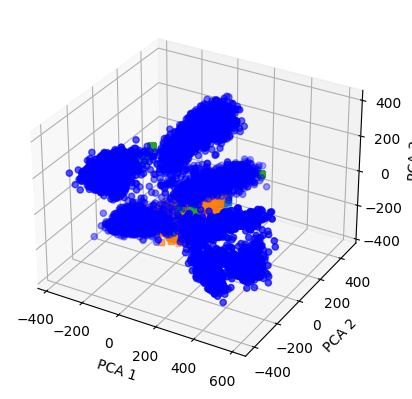

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(real_features_reduced[:, 0], real_features_reduced[:, 1], real_features_reduced[:, 2], c='b', marker='o')
for synthetic_features in ['MSYNTH', 'HuggingFace', 'Mammo_medigan']:
    synthetic_data = np.array(list(features_dict[synthetic_features].values()))
    synthetic_data_transformed = pca.transform(synthetic_data)
    ax.scatter(synthetic_data_transformed[:, 0], synthetic_data_transformed[:, 1], synthetic_data_transformed[:, 2], marker='s')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


VinDr            1.000000
MSYNTH           0.050542
HuggingFace      0.001987
Mammo_medigan    0.000000
Name: Variance, dtype: float64
VinDr            1.000000
MSYNTH           0.000000
HuggingFace      0.489899
Mammo_medigan    0.328283
Name: Shannon, dtype: float64
VinDr            1.000000
MSYNTH           0.000000
HuggingFace      0.146872
Mammo_medigan    0.284430
Name: Convex Hull Volume, dtype: float64


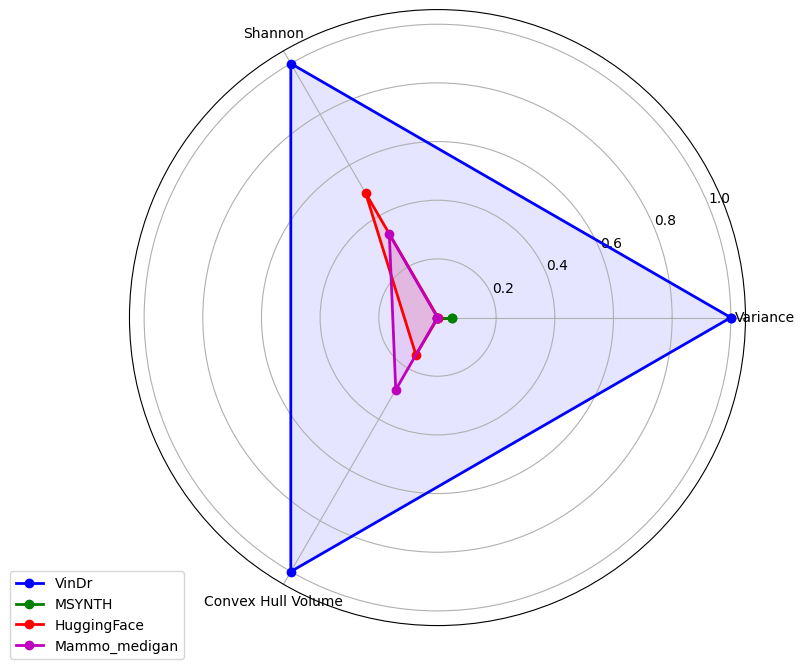

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Variance': [2260.858767, 154.0073612, 46.26399702, 41.85436479],
    'Shannon': [10.94, 8.96, 9.93, 9.61],
    'Convex Hull Volume': [211837751.30611488, 3258901.0669835387, 33893193.98176266, 62584905.298339985]
}

df = pd.DataFrame(data, index=['VinDr', 'MSYNTH', 'HuggingFace', 'Mammo_medigan'])

# Normalize the data
df_normalized = df.copy()
for column in df.columns:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    print(df_normalized[column])

# Number of variables we're plotting.
categories = list(df.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Colors for each dataset
colors = ['b', 'g', 'r', 'm']

# Plot each dataset
for i, (index, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=index, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])  # Fill with transparency

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


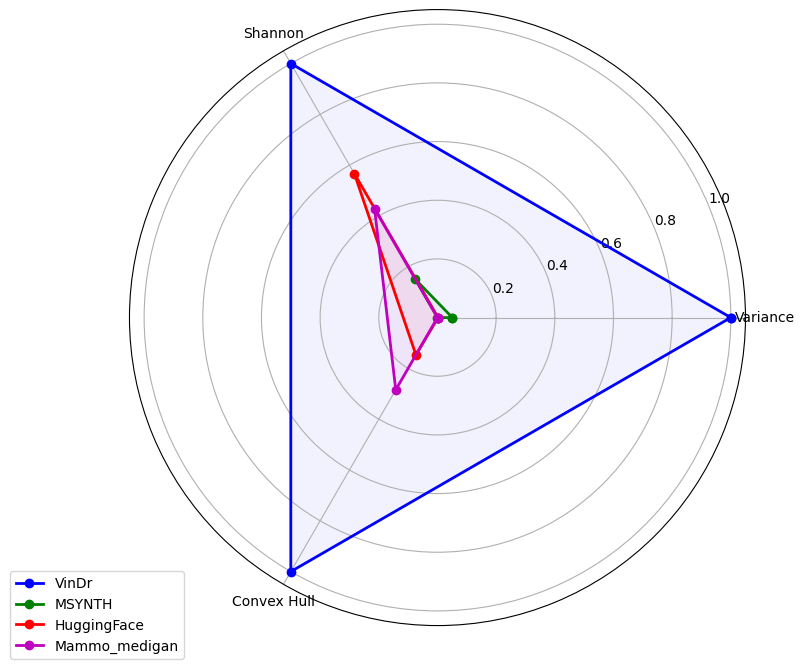

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Variance': [2260.858767, 154.0073612, 46.26399702, 41.85436479],
    'Shannon': [10.94, 8.96, 9.93, 9.61],
    'Convex Hull': [211837751.30611488, 3258897.7834372635, 33893193.98176266, 62584905.298339985]
}

df = pd.DataFrame(data, index=['VinDr', 'MSYNTH', 'HuggingFace', 'Mammo_medigan'])

# Normalize the data
smooth = 0.35  # Small constant to prevent zero values for the smallest values; for visuilization only
df_normalized = df.copy()
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df_normalized[column] = ((df[column] - min_val) + smooth) / ((max_val - min_val) + smooth)

# Number of variables we're plotting.
categories = list(df.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Colors for each dataset
colors = ['b', 'g', 'r', 'm']

# Plot each dataset
for i, (index, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=index, color=colors[i])
    ax.fill(angles, values, alpha=0.05, color=colors[i])  # Fill with transparency

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


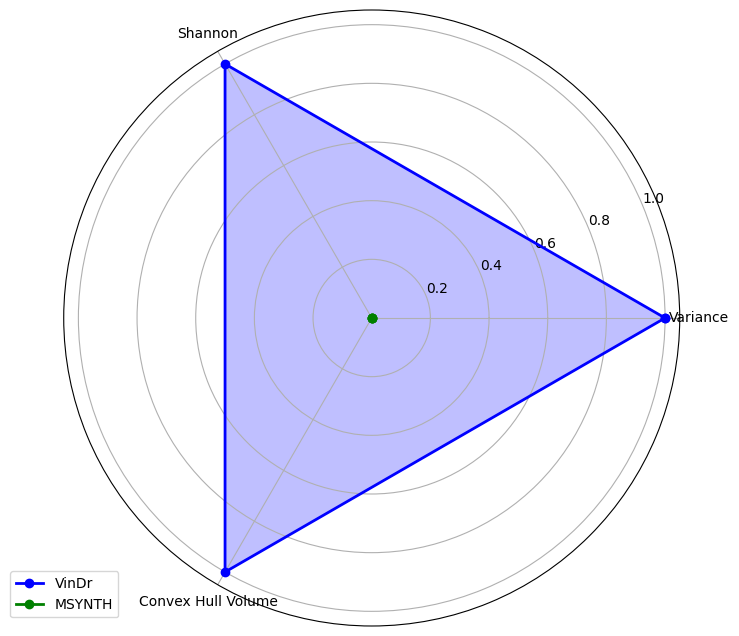

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Variance': [2260.858767, 854.0073612],
    'Shannon': [9.94, 8.96],
    'Convex Hull Volume': [211837751.30611488, 12589018.0669835387]
}

df = pd.DataFrame(data, index=['VinDr', 'MSYNTH'])

# Normalize the data using min-max normalization for each metric
df_normalized = df.copy()
for column in df.columns:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Number of variables we're plotting.
categories = list(df.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Colors for each dataset
colors = ['b', 'g']

# Plot each dataset
for i, (index, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=index, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])  # Fill with transparency

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


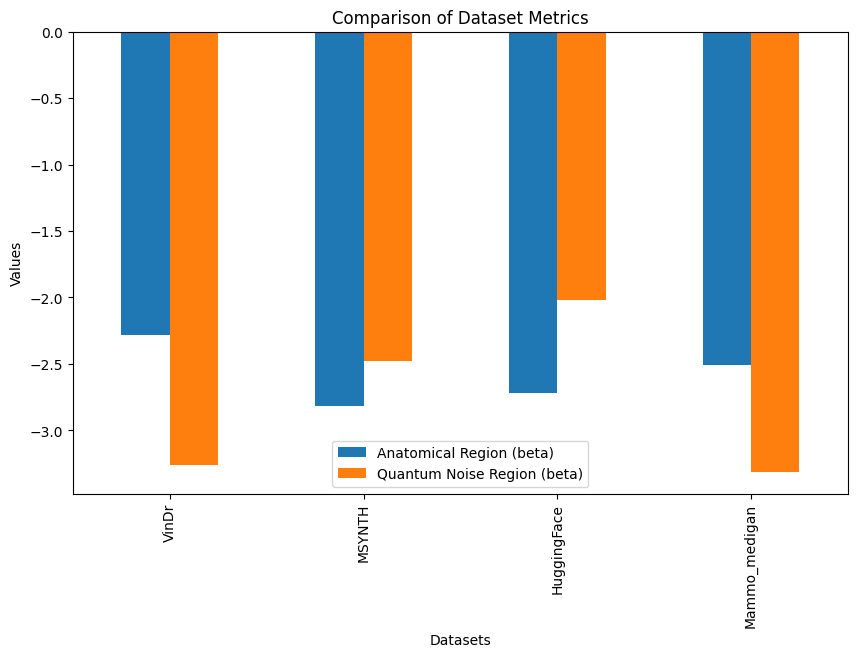

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Anatomical Region (beta)': [-2.28, -2.82, -2.72, -2.51],
    'Quantum Noise Region (beta)': [-3.26, -2.48, -2.02, -3.31],
  #  'Mean intensity Range': [13.4607, 52.3085, 10.65093, 35.4641],
}

df = pd.DataFrame(data, index=['VinDr', 'MSYNTH', 'HuggingFace', 'Mammo_medigan'])

# Plot
ax = df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Comparison of Dataset Metrics')

# Show plot
plt.show()
